<a href="https://colab.research.google.com/github/ayush2444/Bike-Sharing-Demand-Prediction-/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Project Name - Seoul Bike Sharing Demand Prediction

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Bike sharing systems provide a convenient method for renting bicycles through a network of kiosks located throughout a city, where individuals can obtain membership, rent a bike, and automatically return it to any other kiosk location as per their requirement.


With over 500 bike-sharing programs operating globally, the trend of bike and scooter ride-sharing has gained significant momentum, particularly in metropolitan areas such as San Francisco, New York, Chicago, and Los Angeles. However, predicting bike demand on a specific day remains a crucial challenge for these businesses.

The bike sharing system market is picking up speed and gaining momentum globally. In 2019, its market share was valued at an impressive 3.39 billion, and industry experts predict that it will surge to a whopping $6.98 billion by 2027, with a projected compound annual growth rate of around 14% from 2020 to 2027.


Our objective is to develop a predictive model that can estimate the approximate number of bikes rented based on the available dataset, considering that bike sharing systems typically rent bikes on an hourly, daily, or monthly basis, with static pricing inclusive of these time periods. The system's affordability and user-friendly renting process have made it a popular choice for commuters of all kinds.

Our project aims to utilise historical bike usage patterns and weather data to forecast the demand for bike rentals. The dataset we are working with comprises hourly rental data for a span of two years. Specifically, the training set includes data from the first 19 days of each month, while the test set encompasses the period from the 20th to the end of each month.

Our initial step is to conduct an Exploratory Data Analysis on the dataset. We examine the presence of any missing data values, though none were found, and identify and address any outliers in the dataset. Moreover, we carry out correlation analysis to identify the relevant and significant feature set, which we later modify through feature engineering. This involves adjusting a few existing columns and dropping any irrelevant ones from the dataset.



then further on Through the process of feature engineering and data preprocessing, we aimed to identify and isolate impactful features for our analysis. One of the initial steps in this process was to address multicollinearity within the independent variables. We accomplished this through the use of various inflation factor (VIF) measures. then we utilized the interquartile range (IQR) technique to detect and treat outliers in our data. We then capped all outliers of continuous features between the 25th and 75th percentile.

We also noted that certain features were categorical in nature, and as such, were unsuitable for input into a machine learning model in their current form. To address this, we encoded these features into numerical values using the One-Hot Encoding technique, as they were unordered in nature.

Following that, we have divided our dataset  into training and testing sets. The model is then trained using the selection of a machine learning algorithm and the training set of data. In order to determine how effectively the model can predict rented bike count, we lastly assessed its performance on the testing data

Our exploration of machine learning models for the Bike Sharing Demand dataset took us on a journey through various popular approaches. We started with the tried-and-true Linear Regressor, as well as Regularization Models like Ridge and Lasso, and even ventured into the realm of elasticnet. But we didn't stop there; we also delved into more sophisticated ensemble models like Random Forest, decision trees, and Gradient Boost.

Constructing a machine learning model for the Bike Sharing Demand Prediction dataset required a combination of data preprocessing, utilization of various machine learning techniques, and adept model evaluation skills. Despite the challenges, we were able to develop a high-performing model that can effectively predict  the demand of rented bikes. Among the multiple models we trained, XGboost outperformed the others and gave the highest r2 score.  **Finally**, we have developed a model that can successfully predict the demand for rented bikes.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error  
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
# Load Dataset
URL='https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=share_link'
df= pd.read_csv('https://drive.google.com/uc?id='+URL.split('/')[-2] , encoding= 'unicode_escape')

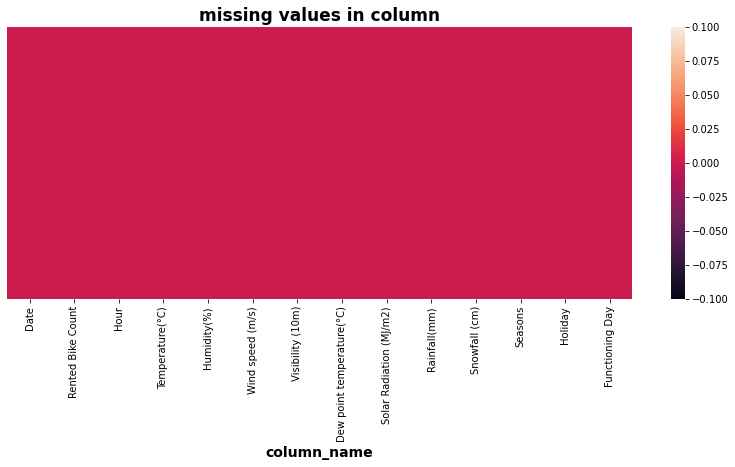

In [3]:
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()
     

In [5]:
df =df.rename(columns= {'Temperature(°C)':'temperature','Rented Bike Count': 'rented_bike_count', 
                        'Hour':'hour', 'Humidity(%)':'humidity',  'Dew point temperature(°C)':'dew_point_temp',
                        'Wind speed (m/s)': 'wind_speed','Visibility (10m)': 'visibility', 'Solar Radiation (MJ/m2)': 'solar_radiation',
                        'Seasons':'seasons', 'Functioning Day':'functioning_day', 'Holiday':'holiday', 'Snowfall (cm)':'snowfall','Rainfall(mm)': 'rainfall'})

Text(0, 0.5, 'Density')

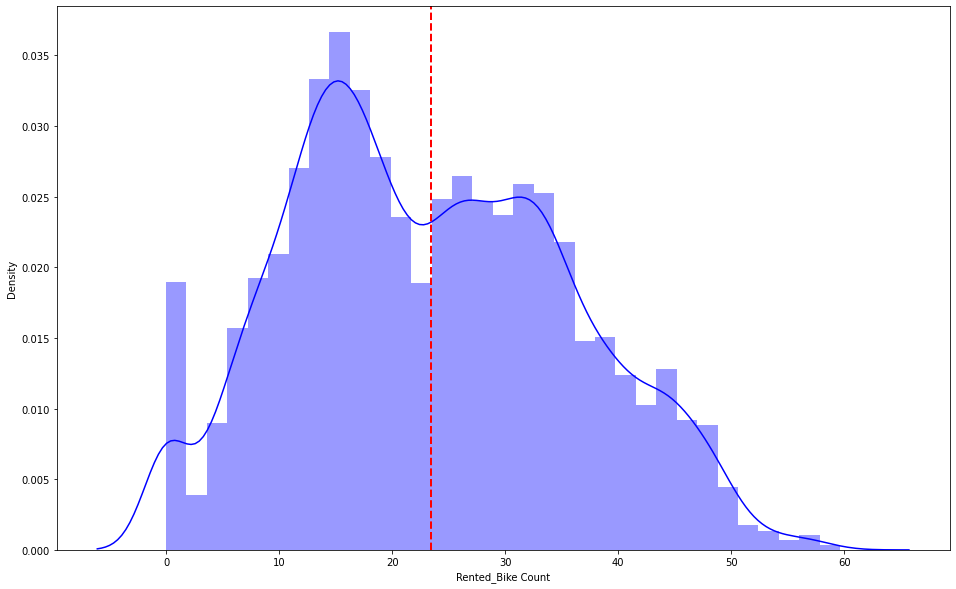

In [6]:
# Chart - 3 visualization code
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(16,10))
ax=sns.distplot(np.sqrt(df['rented_bike_count']), color="blue")
ax.axvline(np.sqrt(df['rented_bike_count']).mean(), linestyle='dashed', color='red', linewidth=2)
plt.xlabel('Rented_Bike Count')
plt.ylabel('Density')